/var/folders/ms/0sq7kkk54q1_5wr9f7c_jgkc0000gn/T/ipykernel_19392/2917285182.py:111: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(bar_plot_data))


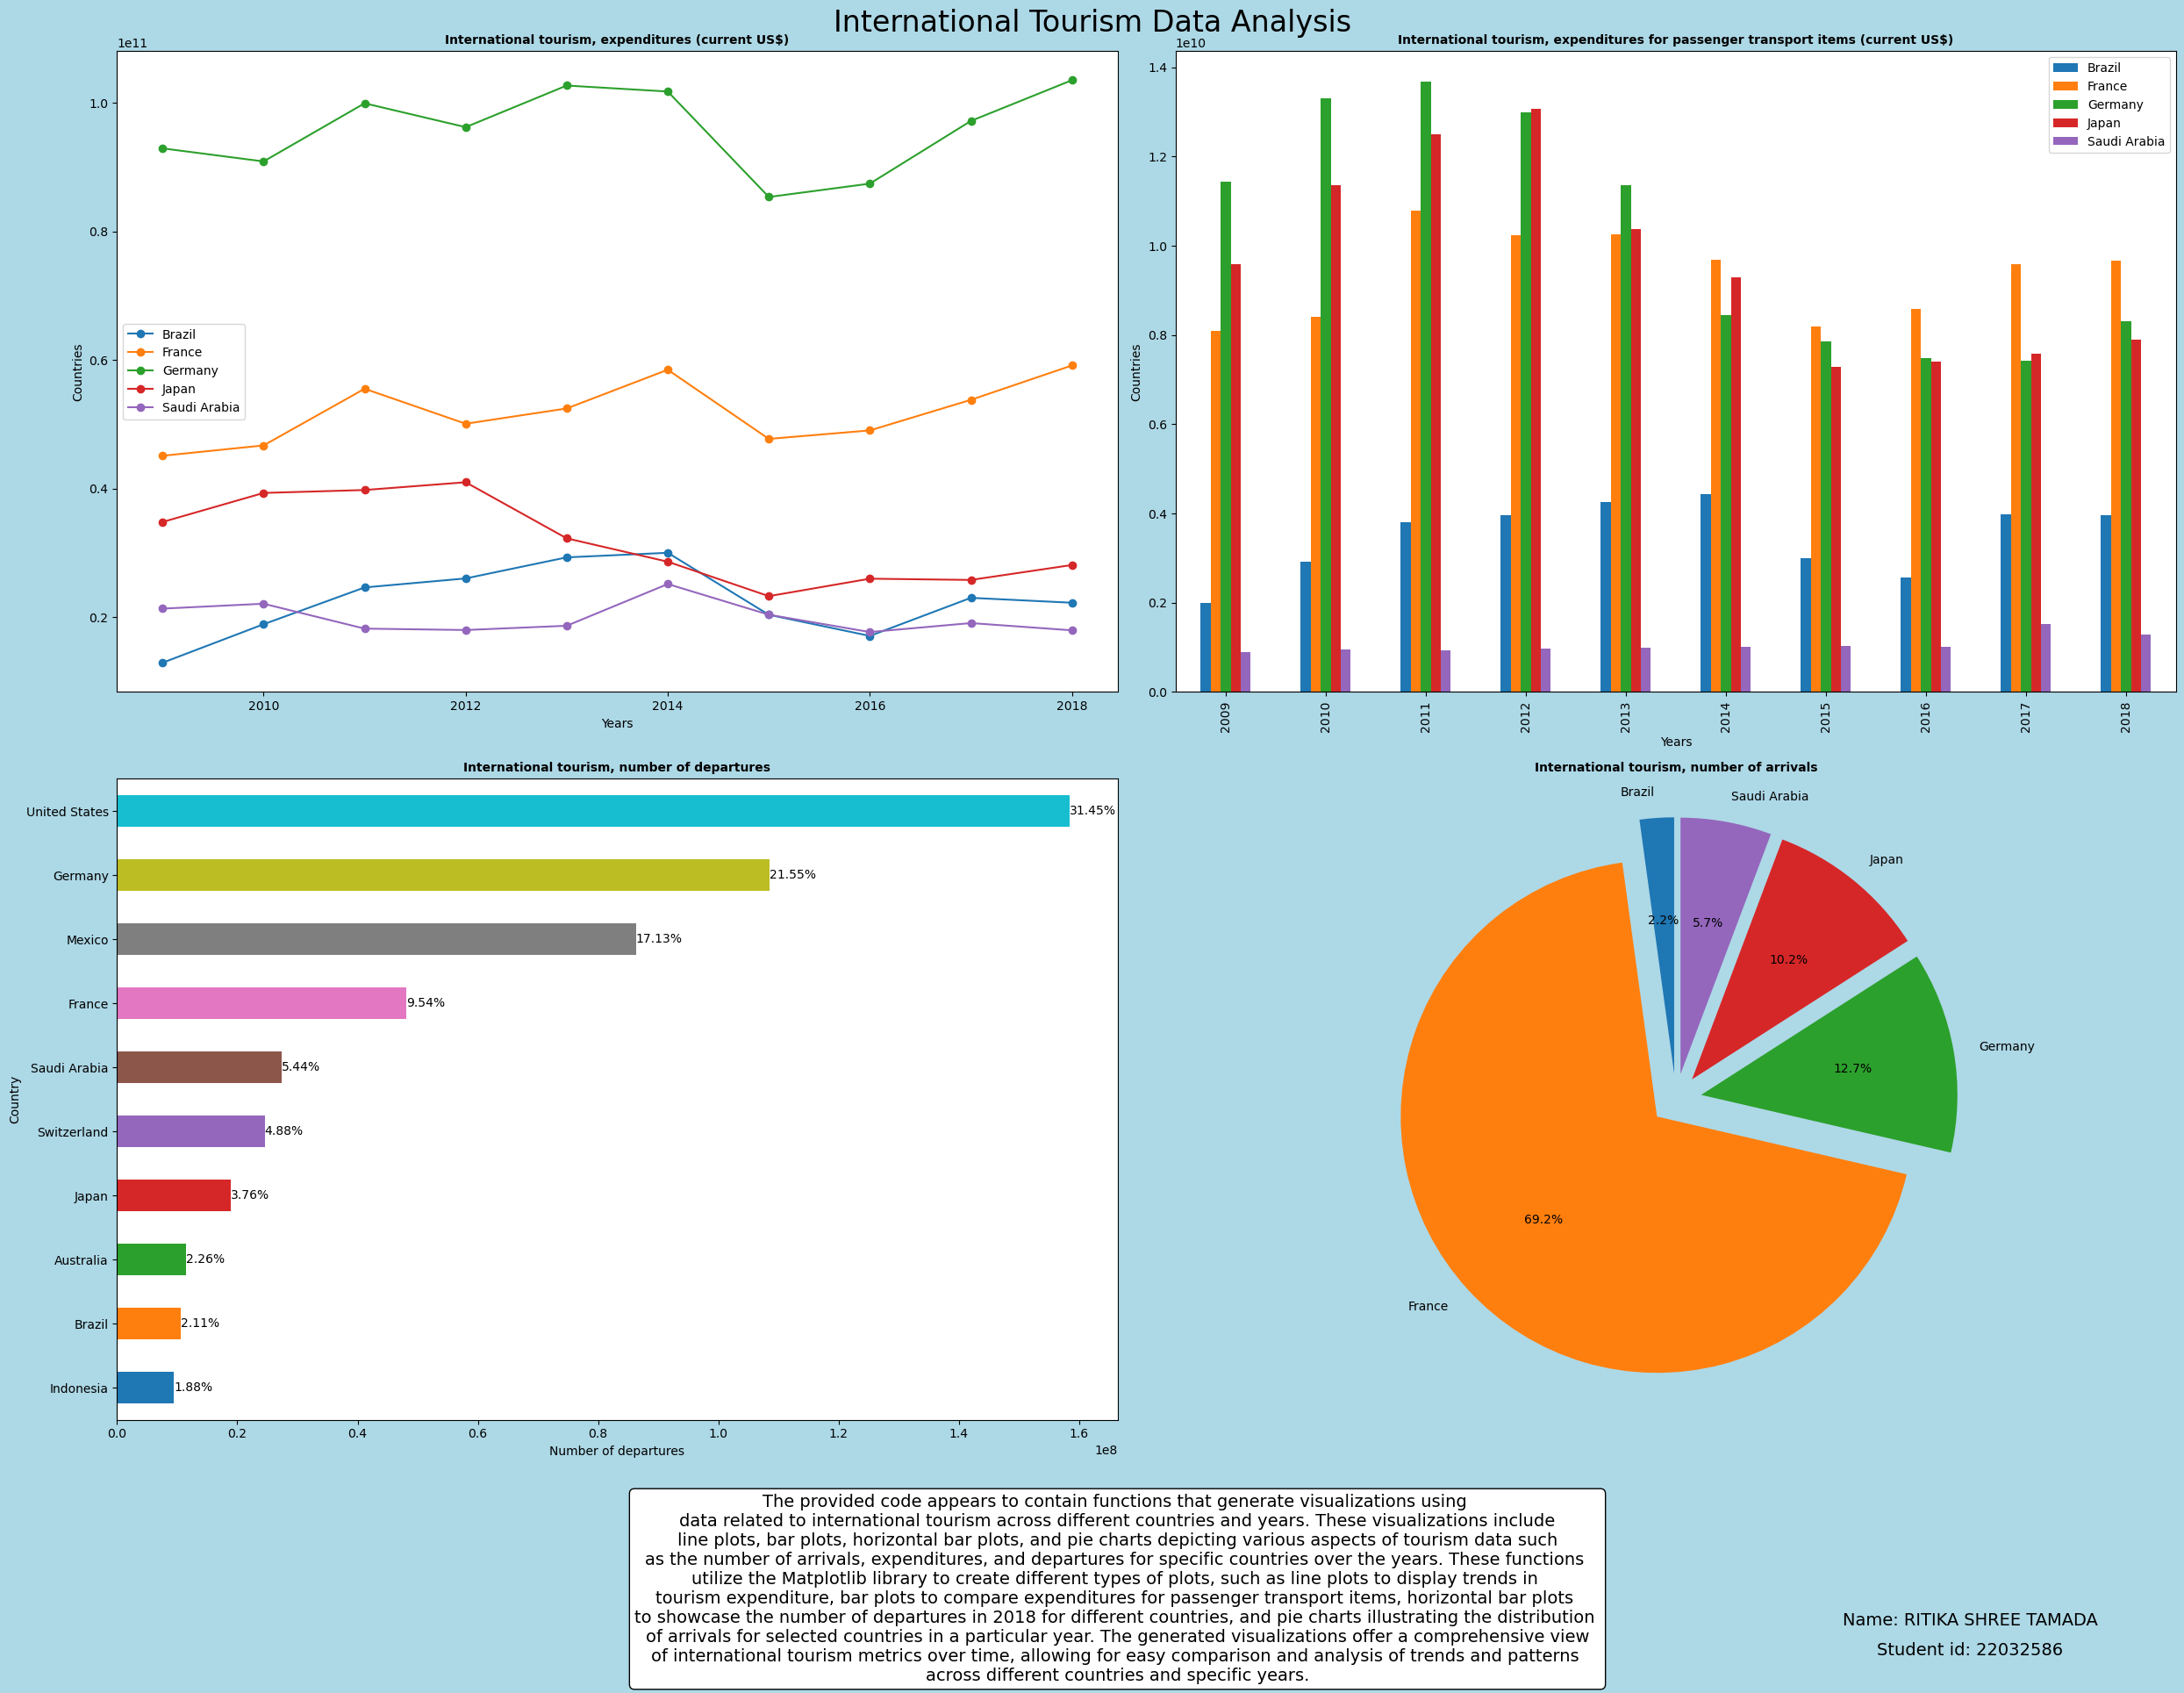

In [1]:
# Import NumPy, a powerful library for numerical operations
import numpy as np
# Import the pandas library as pd, used for analysis
import pandas as pd
# Import the matplotlib.pyplot as plt, used to create plots and charts
import matplotlib.pyplot as plt
# Importing the necessary module from Matplotlib for managing fonts
import matplotlib.font_manager as font_manager


# Read data from the CSV file into a Pandas DataFrame
df = pd.read_csv("International Tourism.csv")


def read_data(df, Series_Name, countries):
    """ Read and process data from DataFrame for a specific Series Name 
        and countries.
         Parameters:
          df: DataFrame containing tourism data
          Series_Name: Name of the tourism series
          countries: List of countries
    Returns:
          d1_d: Processed DataFrame with selected Series Name
          d1_f: Processed and transformed DataFrame"""

   # Rename columns in the DataFrame 'df'
    d1 = df.rename(columns={'2009 [YR2009]':'2009', '2010 [YR2010]': '2010', 
                            '2011 [YR2011]':'2011','2012 [YR2012]':'2012', 
                            '2013 [YR2013]': '2013', '2014 [YR2014]': '2014', 
                            '2015 [YR2015]' :'2015', '2016 [YR2016]':'2016', 
                            '2017 [YR2017]':'2017', '2018 [YR2018]':'2018'})
    # Filter the DataFrame based on 'Series Name' to get specific data 
    d2 = d1[(d1['Series Name'] == Series_Name)]
    # Reset index
    dc = d2.reset_index(drop=True)
    # Drop unnecessary columns
    d1_d = dc.drop(['Country Code', 'Series Name', 'Series Code'], axis=1)
    # Transpose the DataFrame
    d1_t = d1_d.transpose()
    # Set the first row as column headers
    d1_t.columns = d1_t.iloc[0]
    # Exclude the first row (previously used for column headers)
    d1_t = d1_t.iloc[1:]
    # Convert the index to numeric values
    d1_t.index = pd.to_numeric(d1_t.index)
    # Create a new 'Years' column using the index values
    d1_t['Years'] = d1_t.index
    # Reset the index to get a new default index and return the modified DF
    d1_f = d1_t.reset_index(drop=True)
    # Return the processed DataFrames
    return d1_d,d1_f


# Create subplots with a specific figure size and background color
fig, axs = plt.subplots(2, 2, figsize=(25, 17), facecolor='lightblue')


def lineplot(ax, line_plot_data, title):
    """ Generate a line plot.
        Parameters:
        ax: Axes object for plotting
        line_plot_data: Data to be plotted
        title: Title of the plot"""
    # Plotting a line graph for specific countries over the years
    line_plot_data.plot(x='Years', y=['Brazil', 'France', 'Germany', 
                                      'Japan', 'Saudi Arabia'], kind='line', 
                        marker='o', ax=ax)
    # Setting the title of the plot with bold font
    ax.set_title(title, fontproperties=font_manager.FontProperties
                 (weight='bold'))
    # Labeling the x-axis as 'Years'
    ax.set_xlabel('Years')
    # Labeling the y-axis as 'Countries'
    ax.set_ylabel('Countries')
    # Displaying the legend in the plot
    ax.legend()
    


def barplot(ax, bar_plot_data, title):
    """ Create a bar plot using specified data for specific countries over years.
       Parameters:
          ax: Axes object for the plot.
          bar_plot_data: DataFrame containing the data to be plotted.
          itle: Title of the plot."""
    # Plotting the bar chart for specific countries over years
    bar_plot_data.plot(x='Years', y=['Brazil', 'France', 'Germany', 'Japan', 
                                     'Saudi Arabia'], kind='bar', ax=ax)
    # Setting the title and font properties for the title
    ax.set_title(title, fontproperties=font_manager.FontProperties
                 (weight='bold'))
    # Labeling the x-axis
    ax.set_xlabel('Years')
    # Labeling the y-axis
    ax.set_ylabel('Countries')
    # Displaying the legend
    ax.legend()
    


def horizontal_barplot(ax, bar_plot_data, year):
    """ Plot a horizontal bar chart showing the number of departures for 
        different countries in a specific year.
        Parameters:
          ax: Axes object for plotting
          bar_plot_data: DataFrame containing data for the horizontal bar plot
          year: Specific year for which the data is plotted"""
    # Set 'Country Name' column as index for easy plotting
    bar_plot_data.set_index('Country Name', inplace=True)
    # Generate a color map for the bars based on the number of countries
    colors = plt.cm.get_cmap('tab10', len(bar_plot_data))
    # Plot horizontal bars for the number of departures
    bar_plot_data.loc[:, year].sort_values().plot(kind='barh', 
                color=colors(np.linspace(0, 1, len(bar_plot_data))), ax=ax)
    # Set the title for the plot
    ax.set_title('International tourism, number of departures', 
                 fontproperties=font_manager.FontProperties(weight='bold'))
    #Set the xlabel for the plot
    ax.set_xlabel('Number of departures')
    #Set the ylabel for the plot
    ax.set_ylabel('Country')
    # Add annotations to display percentages on the bars
    for index, value in enumerate(bar_plot_data.loc[:, year].sort_values()):
        ax.text(value, index, 
                f'{(value / bar_plot_data.loc[:, year].sum())*100:.2f}%', 
                 ha='left', va='center')



def pieplot(ax, pie_plot_data, year, title, autopct='%1.1f%%', fontsize=10):
    """ Generate a pie chart.
        Parameters:
          ax: Axes object for plotting
          pie_plot_data: DataFrame containing data for the pie chart
          year: The specific year for which the pie chart is generated
          title: Title of the pie chart
          autopct: Format string for autopct parameter in the pie chart
          fontsize: Font size for the pie chart"""
    # Set the explode values for the pie chart slices
    explode = [0.1, 0.1, 0.1, 0.1, 0.1]
    # Define labels for the pie chart
    labels = ['Brazil', 'France', 'Germany', 'Japan', 'Saudi Arabia']
    # Plot the pie chart with specified properties
    ax.pie(pie_plot_data.loc[pie_plot_data['Years'] == year, labels].values[0],
           autopct=autopct, explode=explode, labels=labels, startangle=90)
    # Set the title for the pie chart with bold font
    ax.set_title(title, fontproperties=font_manager.FontProperties
                 (weight='bold'))


# List of countries
countries = ['Australia', 'Brazil', 'France', 'Germany', 'Indonesia', 'Japan', 
             'Mexico', 'Saudi Arabia', 'Switzerland', 'United States']
# The data and transposed data is stored in variables Ita and Ita_t
Ita, Ita_t = read_data(df, 'International tourism, number of arrivals', 
                        countries)
# The data and transposed data is stored in variables Itd and Itd_t 
Itd, Itd_t = read_data(df, 'International tourism, number of departures', 
                       countries)
# The data and transposed data is stored in variables Itep and Itep_t
Itep, Itep_t = read_data(df,'International tourism, expenditures for passenger transport items (current US$)', countries)
# The data and transposed data is stored in variables Ite and Ite_t
Ite, Ite_t = read_data(df, 'International tourism, expenditures (current US$)', 
                       countries)


# Plotting line plot with respective data and title
lineplot(axs[0, 0], Ite_t, 'International tourism, expenditures (current US$)')
# Plotting bar plot with respective data and title
barplot(axs[0, 1], Itep_t, 'International tourism, expenditures for passenger transport items (current US$)')
# Plotting horizontal bar plot with respective data and title
horizontal_barplot(axs[1, 0], Itd, '2018')
# Plotting pie plot with respective data and title
pieplot(axs[1, 1], Ita_t, 2018, 'International tourism, number of arrivals')


# Setting up the main title for the entire figure
fig.suptitle('International Tourism Data Analysis', fontsize=24)
# Store the student name
student_name = 'RITIKA SHREE TAMADA'
 # Store the student ID
student_id = '22032586'
# Call plt.tight_layout() to adjust subplot parameters for a better layout
plt.tight_layout()


# Add description
description = """The provided code appears to contain functions that generate visualizations using 
data related to international tourism across different countries and years. These visualizations include
line plots, bar plots, horizontal bar plots, and pie charts depicting various aspects of tourism data such
as the number of arrivals, expenditures, and departures for specific countries over the years. These functions 
utilize the Matplotlib library to create different types of plots, such as line plots to display trends in 
tourism expenditure, bar plots to compare expenditures for passenger transport items, horizontal bar plots 
to showcase the number of departures in 2018 for different countries, and pie charts illustrating the distribution 
of arrivals for selected countries in a particular year. The generated visualizations offer a comprehensive view
of international tourism metrics over time, allowing for easy comparison and analysis of trends and patterns 
across different countries and specific years."""
# Creating a dictionary named box_props to define properties for a box
box_props = dict(boxstyle='round', facecolor='white', alpha=1.0)
# Display text on the subplot
axs[0, 0].text(1.0, -1.4, description, ha='center', va='center', fontsize=14, 
               transform=axs[0, 0].transAxes,bbox=box_props)
# Add text to a figure using fig.text() method
fig.text(0.9, -0.1, 'Name: {}'.format(student_name), ha='center', va='center',
         fontsize=14, color='black')
# Add text to a figure using fig.text() method
fig.text(0.9, -0.12, 'Student id: {}'.format(student_id), ha='center', 
         va='center', fontsize=14, color='black')
# Save the figure
plt.savefig('22032586.png', dpi=300,bbox_inches='tight')

